<a href="https://colab.research.google.com/github/xuxianshan/hello-world/blob/master/%E7%AC%AC%E4%B8%89%E7%AB%A0%E6%B3%A2%E5%A3%AB%E9%A1%BF%E6%88%BF%E4%BB%B7%E6%95%B0%E6%8D%AE%E9%9B%86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#加载数据
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [29]:
train_data.shape

(404, 13)

In [30]:
test_data.shape

(102, 13)

In [31]:
train_targets.shape

(404,)

In [32]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [0]:
#数据标准化
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std  #用于测试数据标准化的均值和方差都是在训练数据上计算得到的

# 构建网络

In [0]:
#模型定义
#训练数据越少，过拟合越严重，使用较小的网络可以降低过拟合
from keras import models
from keras import layers

def build_model():
  model = models.Sequential()  # Sequential（）用于将同一个模型进行多次实例化
  model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))   #只有一个单元，没有激活函数。是一个线性层，是标量回归-预测单一连续值的回归， 网络可以学会预测任意范围内的值
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])  #MSE-mean squared error均方误差   MAE-mean absolute error 平均绝对误差
  return model

# 利用K折验证

In [35]:
#K折验证
import numpy as np
k=4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

  partial_train_data = np.concatenate(
      [train_data[:i * num_val_samples],
       train_data[(i+1) * num_val_samples:]], axis=0 )
  partial_train_targets = np.concatenate(
      [train_targets[:i * num_val_samples],
       train_targets[(i+1) * num_val_samples:]], axis=0)
  
  model = build_model()   #构建Keras模型
  model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)  #训练模型 静默模式verbose=0
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)  #在验证数据上评估模型
  all_scores.append(val_mae)



processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [36]:
all_scores

[2.2203879049508877, 2.515633491006228, 2.5206431634355297, 2.6614169295471495]

In [37]:
np.mean(all_scores)

2.4795203722349486

In [38]:
#保存每折的验证结果
num_epochs = 500
all_mae_histories = []
for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples : (i+1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples : (i+1) * num_val_samples]

  partial_train_data = np.concatenate(    #准备训练数据：其他所有分区的数据
      [train_data[:i * num_val_samples],
       train_data[(i + 1) * num_val_samples :]], axis=0)
  
  partial_train_targets = np.concatenate(
      [train_targets[:i * num_val_samples],
       train_targets[(i + 1) * num_val_samples :]], axis=0)
  
  model = build_model()   #构建keras模型（已编译）
  history = model.fit(partial_train_data,
                      partial_train_targets,
                      validation_data=(val_data, val_targets),
                      epochs=num_epochs,
                      batch_size=1,
                      verbose=0)
  mae_history = history.history['val_mean_absolute_error']
  all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [0]:
#计算所有轮次中的K折验证分数平均值
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

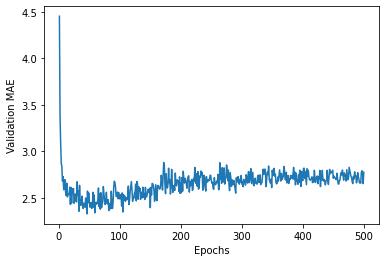

In [40]:
#绘制验证分数
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()  # 纵轴范围较大，且数据方差相对较大

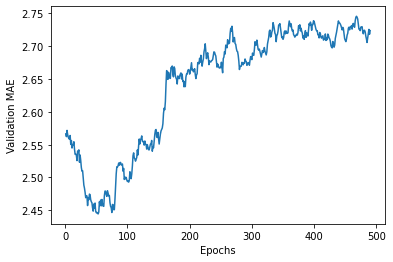

In [41]:
#绘制验证分数（1.删除前10个数据点  2.将每个数据点替换为前面数据点的指数移动平均值，以得到光滑的曲线）
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1-factor))
    else:
      smoothed_points.append(point)
  return smoothed_points
smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()  #可以看出MAE在80轮之后就不再显著下降，之后就开始过拟合

In [42]:
#训练最终模型
model = build_model()  #一个全新编译好的模型
model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)  #在所有训练数据上训练模型
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

ERROR! Session/line number was not unique in database. History logging moved to new session 62
102/102 [==============================] - 0s 3ms/step


In [43]:
test_mae_score   #预测和实际相差了2900美元

2.959231049406762